## Machine Learning - Part 2; Clustering

### This script contains the following steps:

### 1. Importing Libraries and Data
### 2. Cleaning Data, Subsetting  and Renaming Columns
### 3. The Elbow Technique
### 4. k-means Clustering 
### 5. Exporting Visuals and Data

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

- from sklearn.cluster import KMeans - this is where to import the k-means algorithm from scikit-learn.
- import pylab as pl - PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# to ensure that the graphs are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON'

In [4]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\6. Data Analytics Immersion\\WATSON'

In [5]:
# Import data
df = pd.read_excel(os.path.join(path, '02. Data\WA_Customers.xlsx'))

### 2. Cleaning Data, Subsetting  and Renaming Columns

In [6]:
df.head()

,Customer ID,State,Location Code,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,Suburban,2763.519279,Basic,Bachelor,Employed,F,56274,Married,69,32,5,0,1,Corporate Auto,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,Suburban,6979.535903,Extended,Bachelor,Unemployed,F,0,Single,94,13,42,0,8,Personal Auto,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,Suburban,12887.431650,Premium,Bachelor,Employed,F,48767,Married,108,18,38,0,2,Personal Auto,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,Suburban,7645.861827,Basic,Bachelor,Unemployed,M,0,Married,106,18,65,0,7,Corporate Auto,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,Rural,2813.692575,Basic,Bachelor,Employed,M,43836,Single,73,12,44,0,1,Personal Auto,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
print(df['Income'].value_counts(),'\n')

0        2317
95697      12
26876       7
61108       7
25965       7
         ... 
36259       1
69011       1
38638       1
30092       1
51199       1
Name: Income, Length: 5694, dtype: int64 



In [9]:
print(df['Number of Open Complaints'].value_counts(),'\n')

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64 



In [10]:
# create the subset for clustering including only required numberic values 
df_sub1 =  df[['Customer Lifetime Value', 'Monthly Premium Auto', 'Months Since Policy Inception', 'Number of Policies','Total Claim Amount']]

In [11]:
df_sub1.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,2763.519279,69,5,1,384.811147
1,6979.535903,94,42,8,1131.464935
2,12887.431650,108,38,2,566.472247
3,7645.861827,106,65,7,529.881344
4,2813.692575,73,44,1,138.130879


In [12]:
df_sub1.shape

(9134, 5)

In [13]:
df_sub1.rename(columns = {'Customer Lifetime Value' : 'lifetime_value', 'Monthly Premium Auto': 'monthly_payment', 'Months Since Policy Inception' : 'policy_length', 'Number of Policies' : 'policy_count', 'Total Claim Amount': 'claim_sum' }, inplace = True )

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
df_sub1.head()

,lifetime_value,monthly_payment,policy_length,policy_count,claim_sum
0,2763.519279,69,5,1,384.811147
1,6979.535903,94,42,8,1131.464935
2,12887.431650,108,38,2,566.472247
3,7645.861827,106,65,7,529.881344
4,2813.692575,73,44,1,138.130879


In [15]:
# round the desimals
df_sub1['lifetime_value'].round(0)

0        2764.0
1        6980.0
2       12887.0
3        7646.0
4        2814.0
         ...   
9129    23406.0
9130     3097.0
9131     8164.0
9132     7524.0
9133     2612.0
Name: lifetime_value, Length: 9134, dtype: float64

In [16]:
# round the desimals
df_sub1['claim_sum'].round(0)

0        385.0
1       1131.0
2        566.0
3        530.0
4        138.0
         ...  
9129     198.0
9130     379.0
9131     791.0
9132     691.0
9133     370.0
Name: claim_sum, Length: 9134, dtype: float64

In [17]:
print(df_sub1['lifetime_value'].value_counts(),'\n')

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: lifetime_value, Length: 8041, dtype: int64 



In [18]:
print(df_sub1['monthly_payment'].value_counts(),'\n')

65     348
66     307
71     304
73     302
63     289
      ... 
147      1
290      1
273      1
298      1
205      1
Name: monthly_payment, Length: 202, dtype: int64 



In [19]:
print(df_sub1['policy_length'].value_counts(),'\n')

59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: policy_length, Length: 100, dtype: int64 



In [20]:
print(df_sub1['claim_sum'].value_counts(),'\n')

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: claim_sum, Length: 5106, dtype: int64 



In [21]:
print(df_sub1['policy_count'].value_counts(),'\n')

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: policy_count, dtype: int64 



In [22]:
# create the subset for clustering including only required numberic values 
df_sub2 =  df[['Months Since Last Claim', 'Number of Policies','Months Since Policy Inception', 'Total Claim Amount']]

In [23]:
df_sub2.head()

,Months Since Last Claim,Number of Policies,Months Since Policy Inception,Total Claim Amount
0,32,1,5,384.811147
1,13,8,42,1131.464935
2,18,2,38,566.472247
3,18,7,65,529.881344
4,12,1,44,138.130879


In [24]:
df_sub2.rename(columns = {'Months Since Last Claim' : 'last_claim',  'Number of Policies' : 'policy_count', 'Total Claim Amount': 'claim_sum', 'Months Since Policy Inception' : 'policy_length'}, inplace = True )

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
df_sub2.columns

Index(['last_claim', 'policy_count', 'policy_length', 'claim_sum'], dtype='object')

### 3. The Elbow Technique

In [26]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [27]:
score = [kmeans[i].fit(df_sub1).score(df_sub1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-431959432649.7792,
 -154015385820.2785,
 -86274592367.10631,
 -51702519769.68787,
 -34525946579.096634,
 -24639103959.851288,
 -18325541597.91162,
 -14176822567.476162,
 -11177581773.596176]

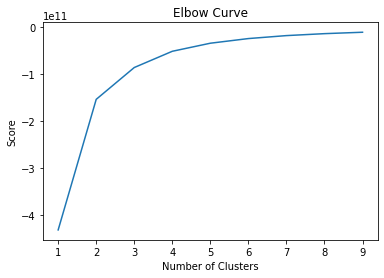

In [28]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

- There's a slight jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [29]:
score = [kmeans[i].fit(df_sub2).score(df_sub2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-778827818.8765494,
 -346141526.61222345,
 -184212275.190912,
 -116837315.3271106,
 -75083915.25860076,
 -54300024.53822075,
 -41524543.31601435,
 -34848339.43671644,
 -29257170.539315455]

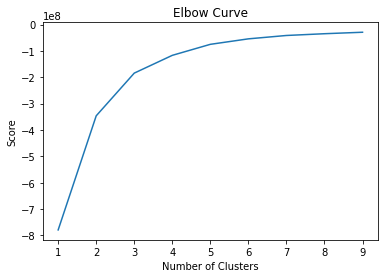

In [30]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. k-means Clustering

In [31]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [32]:
# Fit the k-means object to the data.
kmeans.fit(df_sub1)

C:\Users\senja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [33]:
# Fit the k-means object to the data.
kmeans.fit(df_sub2)

C:\Users\senja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [34]:
df_sub1['clusters'] = kmeans.fit_predict(df_sub1)

C:\Users\senja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-34-798ff301bb89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1['clusters'] = kmeans.fit_predict(df_sub1)


In [35]:
df_sub2['clusters'] = kmeans.fit_predict(df_sub2)

C:\Users\senja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-35-e4fdea7a655a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub2['clusters'] = kmeans.fit_predict(df_sub2)


In [36]:
df_sub1.head()

,lifetime_value,monthly_payment,policy_length,policy_count,claim_sum,clusters
0,2763.519279,69,5,1,384.811147,0
1,6979.535903,94,42,8,1131.464935,0
2,12887.431650,108,38,2,566.472247,1
3,7645.861827,106,65,7,529.881344,0
4,2813.692575,73,44,1,138.130879,0


In [37]:
df_sub2.head()

,last_claim,policy_count,policy_length,claim_sum,clusters
0,32,1,5,384.811147,1
1,13,8,42,1131.464935,2
2,18,2,38,566.472247,0
3,18,7,65,529.881344,0
4,12,1,44,138.130879,1


In [38]:
df_sub1['clusters'].value_counts()

0    7333
1    1466
2     335
Name: clusters, dtype: int64

In [39]:
df_sub2['clusters'].value_counts()

1    4724
0    3750
2     660
Name: clusters, dtype: int64

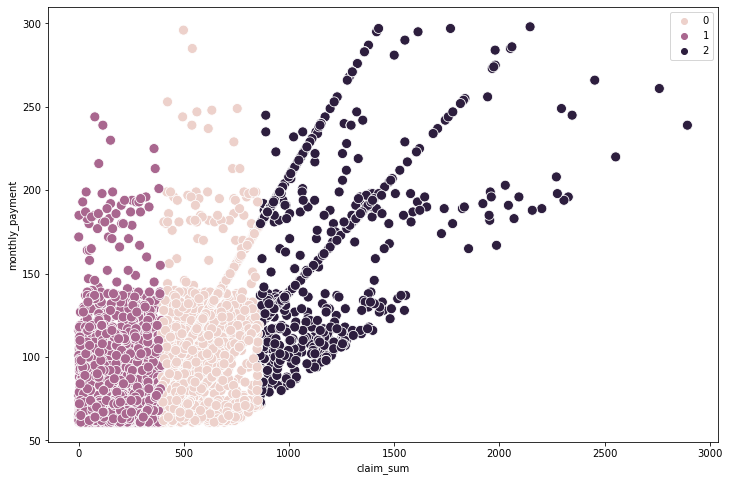

In [54]:
# Plot the clusters for the "monthly_payment" and "claim_sum" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub1['claim_sum'], y=df_sub1['monthly_payment'], hue=kmeans.labels_, s=100) 
# `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('claim_sum') # Label x-axis.
plt.ylabel('monthly_payment') # Label y-axis.
plt.show()

- On the above graph the clusters are clearly visible based on the claim amount and the monthly payment.

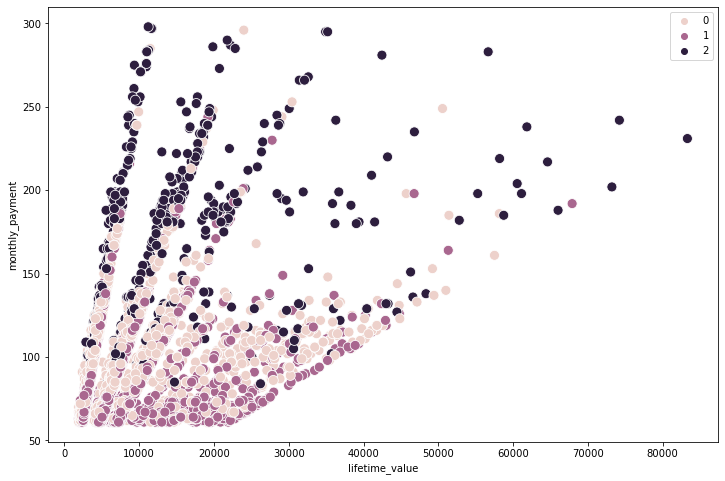

In [41]:
# Plot the clusters for the "lifetime_value" and "monthly_payment variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub1['lifetime_value'], y=df_sub1['monthly_payment'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('lifetime_value') 
plt.ylabel('monthly_payment') 
plt.show()

In [42]:
df_sub1.loc[df_sub1['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub1.loc[df_sub1['clusters'] == 1, 'cluster'] = 'purple'
df_sub1.loc[df_sub1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [43]:
df_sub1.groupby('cluster').agg({'policy_count':['mean', 'median'],'policy_length':['mean', 'median'], 
                         'lifetime_value':['mean', 'median'], 
                         'claim_sum':['mean', 'median'],
                          'monthly_payment':['mean', 'median']})

policy_count        policy_length        lifetime_value  \
                    mean median          mean median           mean   
cluster                                                               
dark purple     2.000000      2     51.044776     57   33546.567986   
pink            3.081686      2     48.126551     48    5389.684714   
purple          2.609141      2     47.073670     47   15249.978180   

                            claim_sum        monthly_payment         
                   median        mean median            mean median  
cluster                                                              
dark purple  31162.693300  593.035222  513.6      126.629851  113.0  
pink          5133.397765  404.939691  355.2       87.293741   76.0  
purple       14194.757345  543.572644  484.8      115.224420  104.5

#### Subset 1 

- The customers with lowest life time value have the lowest average monthly payments and the total amount of claims as expected but they also have the highest average numbers of policies (pink group). There are more variances among those customers with the highest average lifetime value (purple), for example in their monthly payments and the total claim amounts, both mean and median are higher than in the other groups. There are also the highest number of datapoints in this group. 
- Interestingly the average length of policy does not vary very much between groups,  from 47 to 51 months, although there are variances between median and mean of the policy length for the highest life time customers.  The customers with the high life time value have also fewer average number of policies.  
- This subset does not provide the clear clustering options other than grouping the total claim amounts and the monthly payments based on the customer life time value.



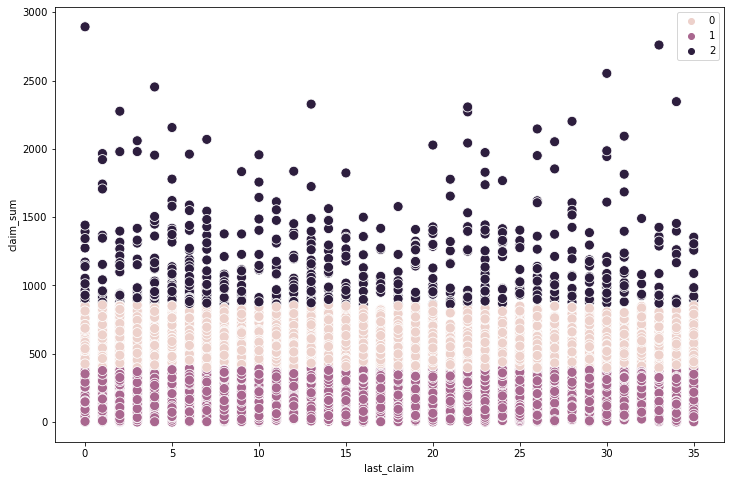

In [44]:
# Plot the clusters for the "last_claim" and "claim_sum" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['last_claim'], y=df_sub2['claim_sum'], hue=kmeans.labels_, s=100) 
# `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('last_claim') # Label x-axis.
plt.ylabel('claim_sum') # Label y-axis.
plt.show()

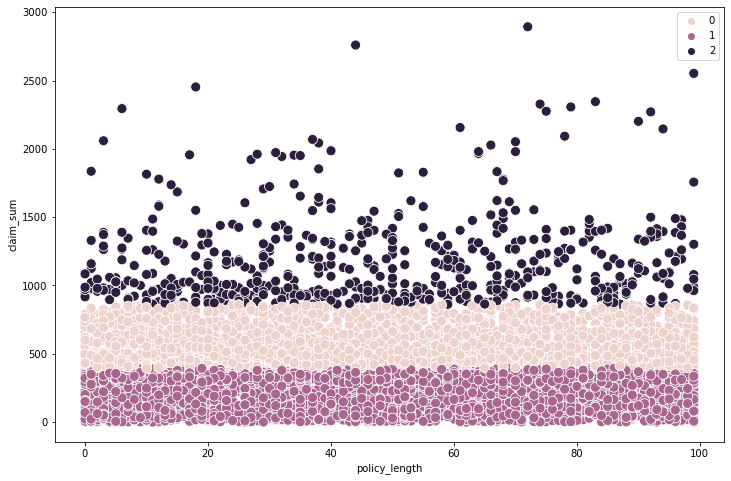

In [45]:
# Plot the clusters for the "last_claim" and "claim_sum" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['policy_length'], y=df_sub2['claim_sum'], hue=kmeans.labels_, s=100) 
# `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('policy_length') # Label x-axis.
plt.ylabel('claim_sum') # Label y-axis.
plt.show()

In [46]:
df_sub2.loc[df_sub2['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub2.loc[df_sub2['clusters'] == 1, 'cluster'] = 'purple'
df_sub2.loc[df_sub2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [47]:
df_sub2.groupby('cluster').agg({'policy_count':['mean', 'median'],'policy_length':['mean', 'median'], 
                         'last_claim':['mean', 'median'], 
                         'claim_sum':['mean', 'median']})

policy_count        policy_length        last_claim         \
                    mean median          mean median       mean median   
cluster                                                                  
dark purple     2.990909      2     48.862121     47  15.480303     14   
pink            2.942933      2     47.493067     48  15.154400     14   
purple          2.981160      2     48.406859     48  14.997883     14   

               claim_sum               
                    mean       median  
cluster                                
dark purple  1163.173028  1061.200615  
pink          556.688939   528.000000  
purple        234.904599   281.110788

#### Subset 2
I wanted to check if there were any clear clusters for the number of policies, the length of policies, the months since the last claim and the total claim amounts but taking all these variables into consideration there are no clear clustering options. The length of the policy or the months since the last claim do not provide any useful data to make sensible clustering groups. There are fewer number of claims under approx. 400 but no clear indication data could be grouped based on the months since last claim or the policy length.

### 5. Exporting Visuals and Data

In [48]:
df_sub1.to_excel(os.path.join(path, '02. Data', 'WA_clusters1.xlsx'))